In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
out_dir = '/Users/tanshi/Desktop/SIP/'
execfile(out_dir+'plot_routines.py')

In [ ]:
#8114 in GOODS-N, 6592 in EGS, 10234 in EGS

In [2]:
Mv_5 = np.loadtxt('Table_Mass_0.5.txt',usecols=(3),unpack=True)
print(Mv_5)

[18.78  18.294 17.903 17.585 17.328 17.107 16.904 16.703 16.503 16.293
 16.069 15.818 15.542 15.255 14.968 14.696 14.442 14.007 13.649 13.34
 13.061 12.801 12.559 12.328 12.114 11.919 11.746 11.604 11.488 11.397
 11.324 11.251 11.176 11.104 11.039 10.975 10.914 10.853 10.796 10.741
 10.422  9.951  9.488  9.047  8.771  8.52   8.285  8.06   7.848  7.64
  7.421  7.171  6.906  6.648  6.385  6.092  5.76 ]


In [3]:
UB_5 = np.loadtxt('Table_Mass_0.5.txt', usecols=(4),unpack=True)
print(UB_5)

BV_5 = np.loadtxt('Table_Mass_0.5.txt', usecols=(5),unpack=True)
print(BV_5)

UV_5 = UB_5 + BV_5
print(UV_5)

[ 1.164  0.984  0.847  0.73   0.628  0.543  0.471  0.406  0.343  0.282
  0.22   0.152  0.079  0.002 -0.075 -0.148 -0.216 -0.336 -0.44  -0.513
 -0.558 -0.582 -0.589 -0.586 -0.575 -0.563 -0.555 -0.553 -0.556 -0.559
 -0.564 -0.573 -0.589 -0.609 -0.631 -0.653 -0.676 -0.698 -0.72  -0.741
 -0.859 -0.995 -1.099 -1.162 -1.192 -1.21  -1.222 -1.232 -1.239 -1.245
 -1.251 -1.255 -1.26  -1.263 -1.266 -1.27  -1.272]
[ 1.462  1.451  1.407  1.357  1.303  1.25   1.202  1.155  1.109  1.06
  1.009  0.953  0.89   0.824  0.758  0.694  0.636  0.532  0.444  0.373
  0.322  0.283  0.255  0.236  0.223  0.213  0.204  0.193  0.182  0.171
  0.16   0.144  0.126  0.106  0.087  0.068  0.051  0.036  0.021  0.009
 -0.057 -0.136 -0.199 -0.242 -0.264 -0.279 -0.289 -0.297 -0.304 -0.309
 -0.315 -0.319 -0.323 -0.327 -0.33  -0.333 -0.335]
[ 2.626  2.435  2.254  2.087  1.931  1.793  1.673  1.561  1.452  1.342
  1.229  1.105  0.969  0.826  0.683  0.546  0.42   0.196  0.004 -0.14
 -0.236 -0.299 -0.334 -0.35  -0.352 -0.35  -0.35

Text(0,0.5,'Mv(mag)')

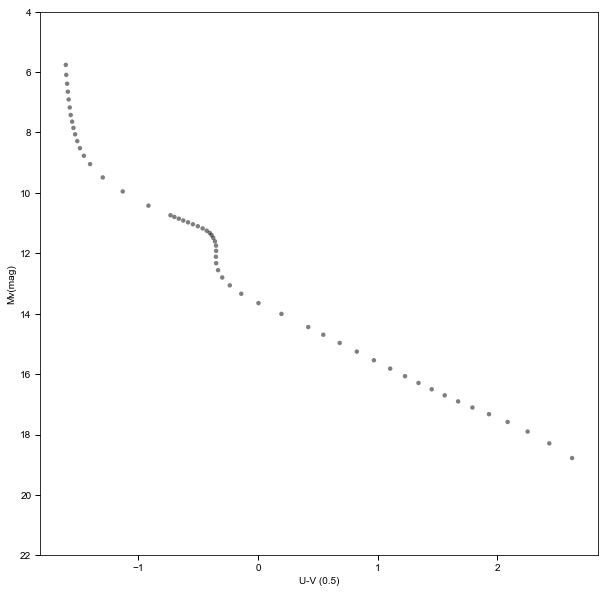

In [4]:
#plotting model WD curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_5, Mv_5, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(22,4)
plt.xlabel('U-V (0.5)')
plt.ylabel('Mv(mag)')

In [5]:
#using weighted averages for U-V from Maddie's table and the Table txt file to find corresponding Mv for each WD
mv = [19.79, 22.09, 19.85, 23.37, 22.69, 22.38, 22.42, 22.88, 22.7, 20.88, 21.15]
maddie_UV = np.array([0.61, 0.84, 0.73, 0.15, 0.02, -0.25, 0.65, 0.18, 0.17, 0.67, 0.88])
Mv_wd_5 = np.array([])

for j in range(len(maddie_UV)):
    for i in range(len(UV_5)):
        if (maddie_UV[j] < UV_5[i]) and (maddie_UV[j] > UV_5[i+1]):
#             x1 = UV[i]
#             y1 = Mv[i]
#             x2 = UV[i+1]
#             y2 = Mv[i+1]
#             x = [x1, x2]
#             y = [y1, y2]
#             plt.scatter(UV, Mv, c='black',edgecolors='none',s=5,alpha=0.5)
#             plt.plot(x, y)
#             plt.ylim(22,4)
            weight1_5 = ((UV_5[i] - maddie_UV[j]) / (UV_5[i] - UV_5[i+1])) * 100
            weight2_5 = ((maddie_UV[j] - UV_5[i+1]) / (UV_5[i] - UV_5[i+1])) * 100
            Mv_wd_5 = np.append(Mv_wd_5, ((Mv_5[i]*weight2_5) + (Mv_5[i+1]*weight1_5)) / (weight1_5 + weight2_5))
            #UV_wd = np.append(UV_wd, (((x1*(UV[i]-x1)) + (weight1)) / ((UV[i]-x1) + (UV[i+1]-x2))))
#             print(UV_wd)
#             for i in range(len(UV_wd)):
#                 Mv_wd = np.append(Mv_wd, )
print(maddie_UV)
print(Mv_wd_5)

[ 0.61  0.84  0.73  0.15  0.02 -0.25  0.65  0.18  0.17  0.67  0.88]
[14.82306569 15.2830979  15.06232867 13.92122917 13.67883333 13.00322222
 14.90248175 13.97716667 13.95852083 14.94218978 15.36337762]


In [6]:
# Using distance modulus equation to solve for D in pc given mv and Mv
# Multiplying by 3.086e+13 to convert from pc to km
# Distance Modulus: mv - Mv = 5logD - 5
distance_wd_pc_5 = np.array([])
distance_wd_km_5 = np.array([])
for i in range(len(mv)):
    distance_wd_pc_5 = np.append(distance_wd_pc_5, (10 ** (((mv[i] - Mv_wd_5[i]) + 5) / 5)))
    distance_wd_km_5 = np.append(distance_wd_km_5, (distance_wd_pc_5[i] * 3.086e+13))
print(distance_wd_pc_5)
print(distance_wd_km_5)

[ 98.48880348 229.81608371  90.68475118 775.8078446  634.21036185
 750.5083968  318.78923653 603.3463179  560.13902787 154.01465374
 143.65623349]
[3.03936448e+15 7.09212434e+15 2.79853142e+15 2.39414301e+16
 1.95717318e+16 2.31606891e+16 9.83783584e+15 1.86192674e+16
 1.72858904e+16 4.75289221e+15 4.43323137e+15]


In [7]:
#Using trend line to guess Mv
def fitline(x):
    return 1.95*x+13.5

#Using distance modulus equation to solve for D given mv and Mv
print 19.79-fitline(0.61)
distance_wd_trend_5 = 10**((mv-fitline(maddie_UV)+5)/5)

print ('Distance in parsecs: ')
print distance_wd_trend_5
print
print('Distance in km: ')
distance_wd_km_trend_5 = distance_wd_trend_5 * 3.086e+13
print distance_wd_km_trend_5

5.1005
Distance in parsecs: 
[104.73696861 245.69708276  96.67184338 823.18983692 676.39439481
 747.30863419 339.23448954 639.44029453 593.88177789 163.94568853
 153.7446457 ]

Distance in km: 
[3.23218285e+15 7.58221197e+15 2.98329309e+15 2.54036384e+16
 2.08735310e+16 2.30619445e+16 1.04687763e+16 1.97331275e+16
 1.83271917e+16 5.05936395e+15 4.74455977e+15]


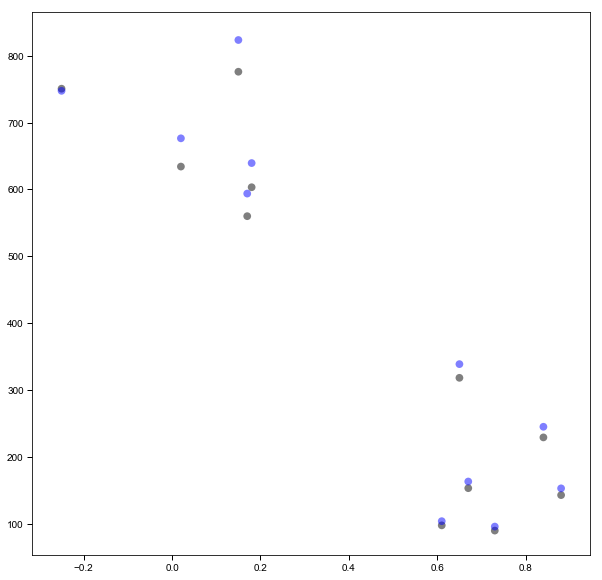

In [8]:
#plotting distance calculated from weighted averages against distance calculated by trend to compare accuracy
fig=plt.figure(figsize=(10,10))
plt.scatter(maddie_UV, distance_wd_pc_5, c='black',edgecolors='none',s=60,alpha=0.5)
plt.scatter(maddie_UV, distance_wd_trend_5, c='blue',edgecolors='none',s=60,alpha=0.5)

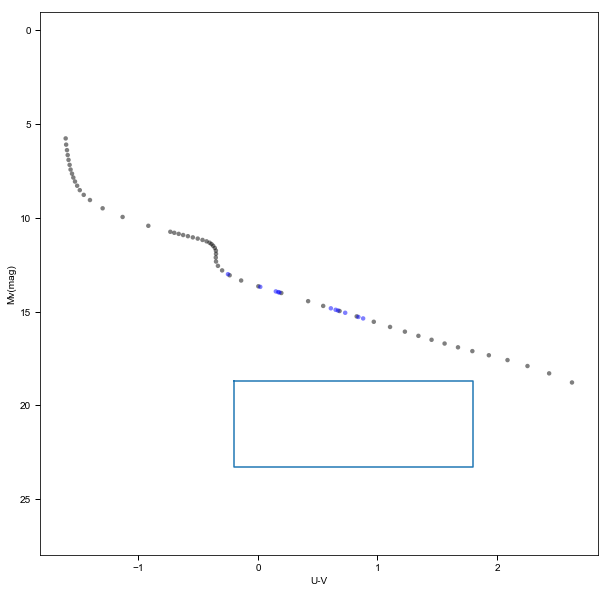

In [9]:
#plotting Mv calculated from weighted averages against UV vs Mv (table txt file) plot
#Mv from weighted averages should lay on the curve since it is an average of two Mv points on the curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_5, Mv_5, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(28,-1)
plt.xlabel('U-V')
plt.ylabel('Mv(mag)')
plt.scatter(maddie_UV, Mv_wd_5, c='blue',edgecolors='none',s=20,alpha=0.5)
x_array = [-0.2, 1.8, 1.8, -0.2, -0.2]
y_array = [18.7, 18.7, 23.3, 23.3, 18.7]
plt.plot(x_array, y_array)

In [10]:
#converting PM from mas/yr to rad/sec
PMW = [2.3, 0, 1.5, 10.2, 7.7, -2.4, 0, -9.7, 1.8, 0.2, 1.6]
PMW_error = [0.1, 0, 0.4, 0.1, 0.1, 0.2, 0, 0.2, 0.2, 0.2, 0.3]
PMN = [-3.3, 0, -2.4, 6.1, -1.3, -8.8, 0, -15.1, 4.8, -1.3, -2.3]
PMN_error = [0.1, 0, 0.4, 0.1, 0.1, 0.2, 0, 0.2, 0.2, 0.2, 0.2]

PMW_radians_per_sec = np.array([])
PMW_error_radians_per_sec = np.array([])
PMN_radians_per_sec = np.array([])
PMN_error_radians_per_sec = np.array([])

#miliarcsec/year
#arcsec/year * 1 year/265.25d * 1d/24h * 1h/60min 

for k in range(len(PMW)):
    PMW_radians_per_sec = np.append(PMW_radians_per_sec, ((PMW[k] / (10 ** 3)) / 206265 / 365.25 / 24 / 3600))
    PMW_error_radians_per_sec = np.append(PMW_error_radians_per_sec, ((PMW_error[k] / (10 ** 3)) / 206265 / 365.25 / 24 / 3600))
    PMN_radians_per_sec = np.append(PMN_radians_per_sec, ((PMN[k] / (10 ** 3)) / 206265 / 365.25 / 24 / 3600))
    PMN_error_radians_per_sec = np.append(PMN_error_radians_per_sec, ((PMN_error[k] / (10 ** 3)) / 206265 / 365.25 / 24 / 3600))

# print(PMW_radians_per_sec)
# print(PMW_error_radians_per_sec)
# print(PMN_radians_per_sec)
# print(PMN_error_radians_per_sec)

print('PMW in radians per sec')
for l in range(len(PMW)):
    print(PMW_radians_per_sec[l], 'error:', PMW_error_radians_per_sec[l])

print

print('PMN in radians per sec')
for m in range(len(PMN)):
    print(PMN_radians_per_sec[m], 'error:', PMN_error_radians_per_sec[m])

PMW in radians per sec
(3.5334449359933375e-16, 'error:', 1.5362804069536253e-17)
(0.0, 'error:', 0.0)
(2.304420610430438e-16, 'error:', 6.145121627814501e-17)
(1.5670060150926974e-15, 'error:', 1.5362804069536253e-17)
(1.1829359133542914e-15, 'error:', 1.5362804069536253e-17)
(-3.687072976688701e-16, 'error:', 3.0725608139072506e-17)
(0.0, 'error:', 0.0)
(-1.4901919947450162e-15, 'error:', 3.0725608139072506e-17)
(2.7653047325165255e-16, 'error:', 3.0725608139072506e-17)
(3.0725608139072506e-17, 'error:', 3.0725608139072506e-17)
(2.4580486511258005e-16, 'error:', 4.608841220860876e-17)

PMN in radians per sec
(-5.069725342946963e-16, 'error:', 1.5362804069536253e-17)
(0.0, 'error:', 0.0)
(-3.687072976688701e-16, 'error:', 6.145121627814501e-17)
(9.371310482417114e-16, 'error:', 1.5362804069536253e-17)
(-1.9971645290397127e-16, 'error:', 1.5362804069536253e-17)
(-1.3519267581191906e-15, 'error:', 3.0725608139072506e-17)
(0.0, 'error:', 0.0)
(-2.3197834144999736e-15, 'error:', 3.0725608

In [50]:
#converting PM from rad/sec to km/sec
PMW_km_per_sec_5 = np.array([])
PMW_km_per_sec_error_5 = np.array([])
PMN_km_per_sec_5 = np.array([])
PMN_km_per_sec_error_5 = np.array([])

print('PMW in km per sec')
for i in range(len(PMW)):
    print(PMW_radians_per_sec[i] * distance_wd_km_5[i], 'error:', PMW_error_radians_per_sec[i] * distance_wd_km_5[i])
    PMW_km_per_sec_5 = np.append(PMW_km_per_sec_5, (PMW_radians_per_sec[i] * distance_wd_km_5[i]))
    PMW_km_per_sec_error_5 = np.append(PMW_km_per_sec_error_5, (PMW_error_radians_per_sec[i] * distance_wd_km_5[i]))

print(PMW_km_per_sec_5)
print(PMW_km_per_sec_error_5)

print

print('PMN in km per sec')
for j in range(len(PMN)):
    print(PMN_radians_per_sec[j] * distance_wd_km_5[j], 'error: ', PMN_error_radians_per_sec[j] * distance_wd_km_5[j])
    PMN_km_per_sec_5 = np.append(PMN_km_per_sec_5, (PMN_radians_per_sec[j] * distance_wd_km_5[j]))
    PMN_km_per_sec_error_5 = np.append(PMN_km_per_sec_error_5, (PMN_error_radians_per_sec[j] * distance_wd_km_5[j]))

print(PMN_km_per_sec_5)
print(PMN_km_per_sec_error_5)

PMW in km per sec
(1.0739427013873424, 'error:', 0.04669316092988446)
(0.0, 'error:', 0.0)
(0.6448993486590999, 'error:', 0.17197315964242665)
(37.51636495220639, 'error:', 0.3678074995314352)
(23.15210439325566, 'error:', 0.3006766804318917)
(-8.539515099471343, 'error:', 0.7116262582892785)
(0.0, 'error:', 0.0)
(-27.74628318341745, 'error:', 0.5720883130601537)
(4.780075452910089, 'error:', 0.5311194947677877)
(0.14603550370752078, 'error:', 0.14603550370752078)
(1.0897098378257157, 'error:', 0.20432059459232169)
[  1.0739427    0.           0.64489935  37.51636495  23.15210439
  -8.5395151    0.         -27.74628318   4.78007545   0.1460355
   1.08970984]
[0.04669316 0.         0.17197316 0.3678075  0.30067668 0.71162626
 0.         0.57208831 0.53111949 0.1460355  0.20432059]

PMN in km per sec
(-1.5408743106861869, 'error: ', 0.04669316092988446)
(0.0, 'error: ', 0.0)
(-1.03183895785456, 'error: ', 0.17197315964242665)
(22.436257471417548, 'error: ', 0.3678074995314352)
(-3.908796

In [12]:
'*******************************************************************************************************************'

'*******************************************************************************************************************'

In [13]:
Mv_6 = np.loadtxt('Table_Mass_0.6.txt',usecols=(3),unpack=True)
print(Mv_6)

[18.984 18.491 18.097 17.774 17.51  17.285 17.082 16.883 16.684 16.478
 16.257 16.012 15.742 15.462 15.178 14.909 14.658 14.222 13.865 13.557
 13.281 13.023 12.783 12.554 12.342 12.149 11.977 11.834 11.714 11.615
 11.544 11.476 11.406 11.336 11.27  11.207 11.148 11.09  11.036 10.982
 10.682 10.241  9.814  9.433  9.19   8.986  8.793  8.616  8.446  8.286
  8.126  7.968  7.795  7.589  7.388  7.183  6.951]


In [14]:
UB_6 = np.loadtxt('Table_Mass_0.6.txt', usecols=(4),unpack=True)
print(UB_6)

BV_6 = np.loadtxt('Table_Mass_0.6.txt', usecols=(5),unpack=True)
print(BV_6)

UV_6 = UB_6 + BV_6
print(UV_6)

[ 1.113  0.944  0.813  0.702  0.604  0.522  0.453  0.39   0.33   0.272
  0.211  0.146  0.075  0.    -0.076 -0.149 -0.216 -0.335 -0.439 -0.515
 -0.563 -0.591 -0.602 -0.603 -0.597 -0.588 -0.582 -0.582 -0.587 -0.591
 -0.596 -0.603 -0.616 -0.633 -0.652 -0.672 -0.694 -0.715 -0.736 -0.757
 -0.87  -1.005 -1.106 -1.166 -1.196 -1.213 -1.225 -1.234 -1.241 -1.247
 -1.253 -1.257 -1.261 -1.264 -1.268 -1.271 -1.274]
[ 1.418  1.423  1.384  1.336  1.285  1.234  1.189  1.143  1.099  1.052
  1.002  0.948  0.887  0.823  0.757  0.694  0.636  0.533  0.445  0.374
  0.322  0.283  0.255  0.236  0.224  0.215  0.207  0.197  0.187  0.177
  0.167  0.154  0.138  0.12   0.102  0.082  0.065  0.049  0.034  0.021
 -0.046 -0.127 -0.193 -0.237 -0.26  -0.275 -0.286 -0.294 -0.301 -0.306
 -0.312 -0.316 -0.32  -0.324 -0.327 -0.33  -0.333]
[ 2.531  2.367  2.197  2.038  1.889  1.756  1.642  1.533  1.429  1.324
  1.213  1.094  0.962  0.823  0.681  0.545  0.42   0.198  0.006 -0.141
 -0.241 -0.308 -0.347 -0.367 -0.373 -0.373 -0.

Text(0,0.5,'Mv(mag)')

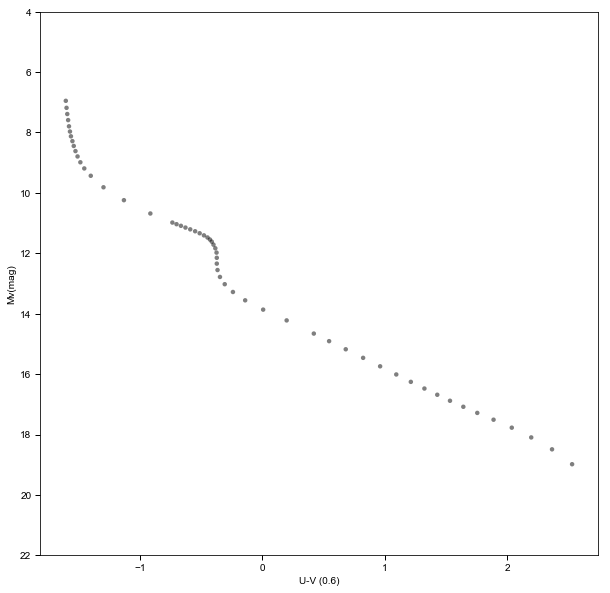

In [15]:
#plotting model WD curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_6, Mv_6, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(22,4)
plt.xlabel('U-V (0.6)')
plt.ylabel('Mv(mag)')

In [16]:
#using weighted averages for U-V from Maddie's table and the Table txt file to find corresponding Mv for each WD
mv = [19.79, 22.09, 19.85, 23.37, 22.69, 22.38, 22.42, 22.88, 22.7, 20.88, 21.15]
maddie_UV = np.array([0.61, 0.84, 0.73, 0.15, 0.02, -0.25, 0.65, 0.18, 0.17, 0.67, 0.88])
Mv_wd_6 = np.array([])
for j in range(len(maddie_UV)):
    for i in range(len(UV_6)):
        if (maddie_UV[j] < UV_6[i]) and (maddie_UV[j] > UV_6[i+1]):
#             x1 = UV[i]
#             y1 = Mv[i]
#             x2 = UV[i+1]
#             y2 = Mv[i+1]
#             x = [x1, x2]
#             y = [y1, y2]
#             plt.scatter(UV, Mv, c='black',edgecolors='none',s=5,alpha=0.5)
#             plt.plot(x, y)
#             plt.ylim(22,4)
            weight1_6 = ((UV_6[i] - maddie_UV[j]) / (UV_6[i] - UV_6[i+1])) * 100
            weight2_6 = ((maddie_UV[j] - UV_6[i+1]) / (UV_6[i] - UV_6[i+1])) * 100
            Mv_wd_6 = np.append(Mv_wd_6, ((Mv_6[i]*weight2_6) + (Mv_6[i+1]*weight1_6)) / (weight1_6 + weight2_6))
            #UV_wd = np.append(UV_wd, (((x1*(UV[i]-x1)) + (weight1)) / ((UV[i]-x1) + (UV[i+1]-x2))))
#             print(UV_wd)
#             for i in range(len(UV_wd)):
#                 Mv_wd = np.append(Mv_wd, )
print(maddie_UV)
print(Mv_wd_6)

[ 0.61  0.84  0.73  0.15  0.02 -0.25  0.65  0.18  0.17  0.67  0.88]
[15.03756618 15.4962446  15.276      14.13275    13.89103125 13.24634328
 15.11668382 14.18853125 14.1699375  15.15624265 15.57682014]


In [17]:
# Using distance modulus equation to solve for D in pc given mv and Mv
# Multiplying by 3.086e+13 to convert from pc to km
# Distance Modulus: mv - Mv = 5logD - 5
distance_wd_pc_6 = np.array([])
distance_wd_km_6 = np.array([])
for i in range(len(mv)):
    distance_wd_pc_6 = np.append(distance_wd_pc_6, (10 ** (((mv[i] - Mv_wd_6[i]) + 5) / 5)))
    distance_wd_km_6 = np.append(distance_wd_km_6, (distance_wd_pc_6[i] * 3.086e+13))
print(distance_wd_pc_6)
print(distance_wd_km_6)

[ 89.22504275 208.32964756  82.18640804 703.80119516 575.16672109
 671.01363216 288.84392331 547.3860811  508.17406878 139.55695037
 130.20749123]
[2.75348482e+15 6.42905292e+15 2.53627255e+15 2.17193049e+16
 1.77496450e+16 2.07074807e+16 8.91372347e+15 1.68923345e+16
 1.56822518e+16 4.30672749e+15 4.01820318e+15]


In [18]:
#Using trend line to guess Mv
def fitline(x):
    return 1.95*x+13.5

#Using distance modulus equation to solve for D given mv and Mv
print 19.79-fitline(0.61)
distance_wd_trend_6 = 10**((mv-fitline(maddie_UV)+5)/5)

print ('Distance in parsecs: ')
print distance_wd_trend_6
print
print('Distance in km: ')
distance_wd_km_trend_6 = distance_wd_trend_6 * 3.086e+13
print distance_wd_km_trend_6

5.1005
Distance in parsecs: 
[104.73696861 245.69708276  96.67184338 823.18983692 676.39439481
 747.30863419 339.23448954 639.44029453 593.88177789 163.94568853
 153.7446457 ]

Distance in km: 
[3.23218285e+15 7.58221197e+15 2.98329309e+15 2.54036384e+16
 2.08735310e+16 2.30619445e+16 1.04687763e+16 1.97331275e+16
 1.83271917e+16 5.05936395e+15 4.74455977e+15]


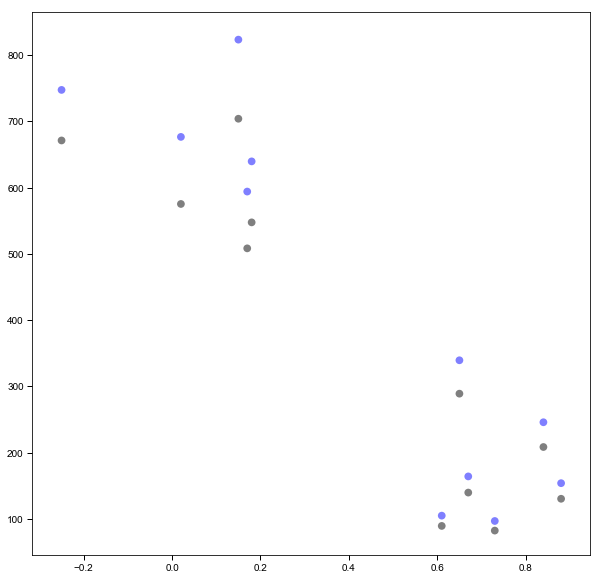

In [19]:
#plotting distance calculated from weighted averages against distance calculated by trend to compare accuracy
fig=plt.figure(figsize=(10,10))
plt.scatter(maddie_UV, distance_wd_pc_6, c='black',edgecolors='none',s=60,alpha=0.5)
plt.scatter(maddie_UV, distance_wd_trend_6, c='blue',edgecolors='none',s=60,alpha=0.5)

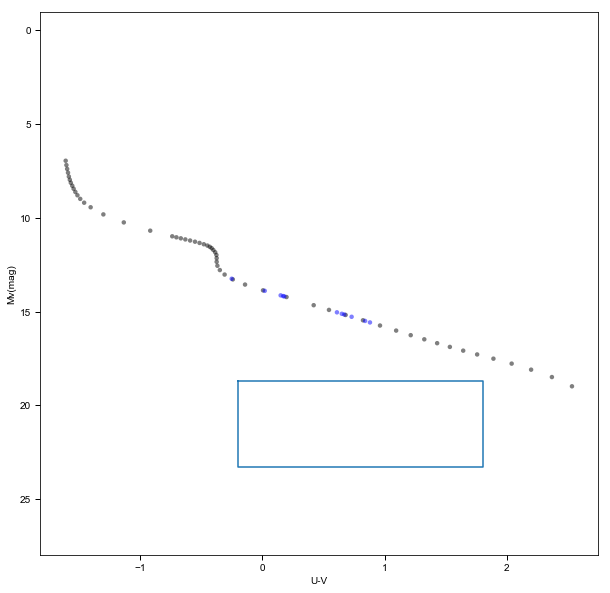

In [20]:
#plotting Mv calculated from weighted averages against UV vs Mv (table txt file) plot
#Mv from weighted averages should lay on the curve since it is an average of two Mv points on the curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_6, Mv_6, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(28,-1)
plt.xlabel('U-V')
plt.ylabel('Mv(mag)')
plt.scatter(maddie_UV, Mv_wd_6, c='blue',edgecolors='none',s=20,alpha=0.5)
x_array = [-0.2, 1.8, 1.8, -0.2, -0.2]
y_array = [18.7, 18.7, 23.3, 23.3, 18.7]
plt.plot(x_array, y_array)

In [51]:
#converting PM from rad/sec to km/sec
PMW_km_per_sec_6 = np.array([])
PMW_km_per_sec_error_6 = np.array([])
PMN_km_per_sec_6 = np.array([])
PMN_km_per_sec_error_6 = np.array([])

print('PMW in km per sec')
for i in range(len(PMW)):
    print(PMW_radians_per_sec[i] * distance_wd_km_6[i], 'error:', PMW_error_radians_per_sec[i] * distance_wd_km_6[i])
    PMW_km_per_sec_6 = np.append(PMW_km_per_sec_6, (PMW_radians_per_sec[i] * distance_wd_km_6[i]))
    PMW_km_per_sec_error_6 = np.append(PMW_km_per_sec_error_6, (PMW_error_radians_per_sec[i] * distance_wd_km_6[i]))

print(PMW_km_per_sec_6)
print(PMW_km_per_sec_error_6)

print

print('PMN in km per sec')
for j in range(len(PMN)):
    print(PMN_radians_per_sec[j] * distance_wd_km_6[j], 'error: ', PMN_error_radians_per_sec[j] * distance_wd_km_6[j])
    PMN_km_per_sec_6 = np.append(PMN_km_per_sec_6, (PMN_radians_per_sec[j] * distance_wd_km_6[j]))
    PMN_km_per_sec_error_6 = np.append(PMN_km_per_sec_error_6, (PMN_error_radians_per_sec[j] * distance_wd_km_6[j]))

print(PMN_km_per_sec_6)
print(PMN_km_per_sec_error_6)

PMW in km per sec
(0.9729286990888931, 'error:', 0.04230124778647362)
(0.0, 'error:', 0.0)
(0.5844638742682535, 'error:', 0.15585703313820093)
(34.034281394962456, 'error:', 0.33366942544080846)
(20.99669253489848, 'error:', 0.27268431863504516)
(-7.634999246123421, 'error:', 0.6362499371769518)
(0.0, 'error:', 0.0)
(-25.172821588892106, 'error:', 0.5190272492555075)
(4.336620501511447, 'error:', 0.4818467223901608)
(0.13232682117382846, 'error:', 0.13232682117382846)
(0.9876938904960666, 'error:', 0.1851926044680125)
[  0.9729287    0.           0.58446387  34.03428139  20.99669253
  -7.63499925   0.         -25.17282159   4.3366205    0.13232682
   0.98769389]
[0.04230125 0.         0.15585703 0.33366943 0.27268432 0.63624994
 0.         0.51902725 0.48184672 0.13232682 0.1851926 ]

PMN in km per sec
(-1.3959411769536294, 'error: ', 0.04230124778647362)
(0.0, 'error: ', 0.0)
(-0.9351421988292057, 'error: ', 0.15585703313820093)
(20.353834951889315, 'error: ', 0.33366942544080846)
(-3

In [22]:
'*******************************************************************************************************************'

'*******************************************************************************************************************'

In [23]:
Mv_7 = np.loadtxt('Table_Mass_0.7.txt',usecols=(3),unpack=True)
print(Mv_7)

[19.186 18.684 18.29  17.965 17.696 17.466 17.261 17.063 16.866 16.662
 16.445 16.205 15.942 15.667 15.387 15.12  14.872 14.437 14.08  13.774
 13.5   13.244 13.006 12.78  12.569 12.377 12.204 12.06  11.937 11.833
 11.758 11.691 11.626 11.559 11.492 11.429 11.37  11.314 11.261 11.208
 10.915 10.488 10.079  9.732  9.504  9.329  9.169  9.035  8.902  8.777
  8.653  8.535  8.416  8.282  8.149  8.019  7.887]


In [24]:
UB_7 = np.loadtxt('Table_Mass_0.7.txt', usecols=(4),unpack=True)
print(UB_7)

BV_7 = np.loadtxt('Table_Mass_0.7.txt', usecols=(5),unpack=True)
print(BV_7)

UV_7 = UB_7 + BV_7
print(UV_7)

[ 1.066  0.913  0.784  0.676  0.582  0.502  0.435  0.376  0.318  0.261
  0.203  0.14   0.071 -0.003 -0.077 -0.15  -0.216 -0.334 -0.438 -0.517
 -0.569 -0.6   -0.615 -0.619 -0.617 -0.611 -0.607 -0.608 -0.614 -0.62
 -0.624 -0.632 -0.642 -0.656 -0.673 -0.691 -0.711 -0.73  -0.751 -0.771
 -0.881 -1.013 -1.112 -1.171 -1.199 -1.215 -1.227 -1.236 -1.243 -1.249
 -1.254 -1.258 -1.263 -1.265 -1.268 -1.271 -1.274]
[ 1.387  1.407  1.371  1.321  1.269  1.22   1.176  1.132  1.089  1.044
  0.996  0.943  0.884  0.821  0.756  0.693  0.636  0.534  0.446  0.375
  0.322  0.283  0.255  0.236  0.224  0.216  0.209  0.2    0.19   0.181
  0.171  0.161  0.147  0.131  0.114  0.095  0.078  0.062  0.046  0.032
 -0.037 -0.121 -0.189 -0.234 -0.257 -0.273 -0.284 -0.292 -0.299 -0.304
 -0.31  -0.314 -0.318 -0.322 -0.325 -0.327 -0.331]
[ 2.453  2.32   2.155  1.997  1.851  1.722  1.611  1.508  1.407  1.305
  1.199  1.083  0.955  0.818  0.679  0.543  0.42   0.2    0.008 -0.142
 -0.247 -0.317 -0.36  -0.383 -0.393 -0.395 -0.3

Text(0,0.5,'Mv(mag)')

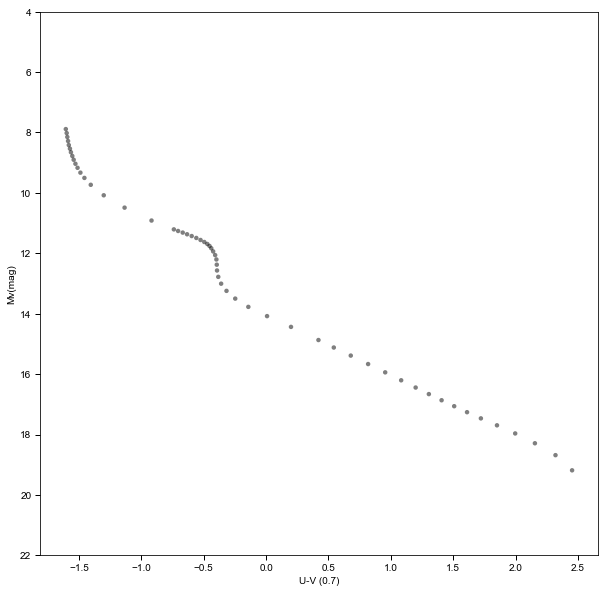

In [25]:
#plotting model WD curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_7, Mv_7, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(22,4)
plt.xlabel('U-V (0.7)')
plt.ylabel('Mv(mag)')

In [26]:
#using weighted averages for U-V from Maddie's table and the Table txt file to find corresponding Mv for each WD
mv = [19.79, 22.09, 19.85, 23.37, 22.69, 22.38, 22.42, 22.88, 22.7, 20.88, 21.15]
maddie_UV = np.array([0.61, 0.84, 0.73, 0.15, 0.02, -0.25, 0.65, 0.18, 0.17, 0.67, 0.88])
Mv_wd_7 = np.array([])
for j in range(len(maddie_UV)):
    for i in range(len(UV_7)):
        if (maddie_UV[j] < UV_7[i]) and (maddie_UV[j] > UV_7[i+1]):
#             x1 = UV[i]
#             y1 = Mv[i]
#             x2 = UV[i+1]
#             y2 = Mv[i+1]
#             x = [x1, x2]
#             y = [y1, y2]
#             plt.scatter(UV, Mv, c='black',edgecolors='none',s=5,alpha=0.5)
#             plt.plot(x, y)
#             plt.ylim(22,4)
            weight1_7 = ((UV_7[i] - maddie_UV[j]) / (UV_7[i] - UV_7[i+1])) * 100
            weight2_7 = ((maddie_UV[j] - UV_7[i+1]) / (UV_7[i] - UV_7[i+1])) * 100
            Mv_wd_7 = np.append(Mv_wd_7, ((Mv_7[i]*weight2_7) + (Mv_7[i+1]*weight1_7)) / (weight1_7 + weight2_7))
            #UV_wd = np.append(UV_wd, (((x1*(UV[i]-x1)) + (weight1)) / ((UV[i]-x1) + (UV[i+1]-x2))))
#             print(UV_wd)
#             for i in range(len(UV_wd)):
#                 Mv_wd = np.append(Mv_wd, )
print(maddie_UV)
print(Mv_wd_7)

[ 0.61  0.84  0.73  0.15  0.02 -0.25  0.65  0.18  0.17  0.67  0.88]
[15.25153676 15.71116058 15.48973381 14.34403125 14.1023125  13.48902857
 15.33006618 14.3998125  14.38121875 15.36933088 15.79145255]


In [27]:
# Using distance modulus equation to solve for D in pc given mv and Mv
# Multiplying by 3.086e+13 to convert from pc to km
# Distance Modulus: mv - Mv = 5logD - 5
distance_wd_pc_7 = np.array([])
distance_wd_km_7 = np.array([])
for i in range(len(mv)):
    distance_wd_pc_7 = np.append(distance_wd_pc_7, (10 ** (((mv[i] - Mv_wd_7[i]) + 5) / 5)))
    distance_wd_km_7 = np.append(distance_wd_km_7, (distance_wd_pc_7[i] * 3.086e+13))
print(distance_wd_pc_7)
print(distance_wd_km_7)

[ 80.85234995 188.69825465  74.48232715 638.54829556 521.8401616
 600.05945845 261.81032193 496.63520253 461.05873036 126.51261235
 117.95313523]
[2.49510352e+15 5.82322814e+15 2.29852462e+15 1.97056004e+16
 1.61039874e+16 1.85178349e+16 8.07946653e+15 1.53261624e+16
 1.42282724e+16 3.90417922e+15 3.64003375e+15]


In [28]:
#Using trend line to guess Mv
def fitline(x):
    return 1.95*x+13.5

#Using distance modulus equation to solve for D given mv and Mv
print 19.79-fitline(0.61)
distance_wd_trend_7 = 10**((mv-fitline(maddie_UV)+5)/5)

print ('Distance in parsecs: ')
print distance_wd_trend_7
print
print('Distance in km: ')
distance_wd_km_trend_7 = distance_wd_trend_7 * 3.086e+13
print distance_wd_km_trend_7

5.1005
Distance in parsecs: 
[104.73696861 245.69708276  96.67184338 823.18983692 676.39439481
 747.30863419 339.23448954 639.44029453 593.88177789 163.94568853
 153.7446457 ]

Distance in km: 
[3.23218285e+15 7.58221197e+15 2.98329309e+15 2.54036384e+16
 2.08735310e+16 2.30619445e+16 1.04687763e+16 1.97331275e+16
 1.83271917e+16 5.05936395e+15 4.74455977e+15]


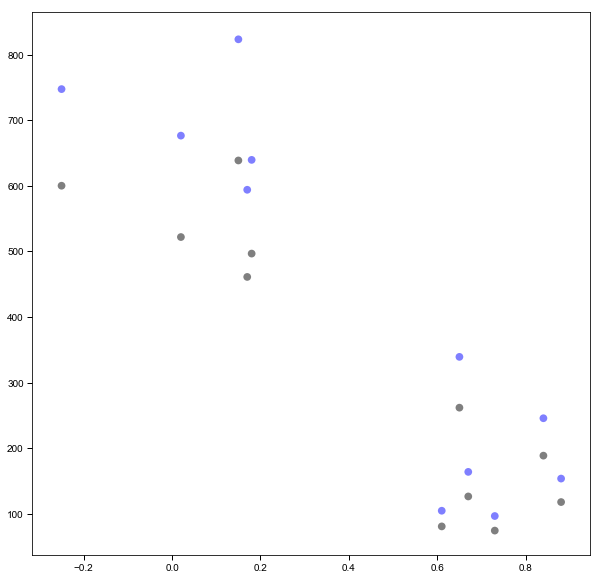

In [29]:
#plotting distance calculated from weighted averages against distance calculated by trend to compare accuracy
fig=plt.figure(figsize=(10,10))
plt.scatter(maddie_UV, distance_wd_pc_7, c='black',edgecolors='none',s=60,alpha=0.5)
plt.scatter(maddie_UV, distance_wd_trend_7, c='blue',edgecolors='none',s=60,alpha=0.5)

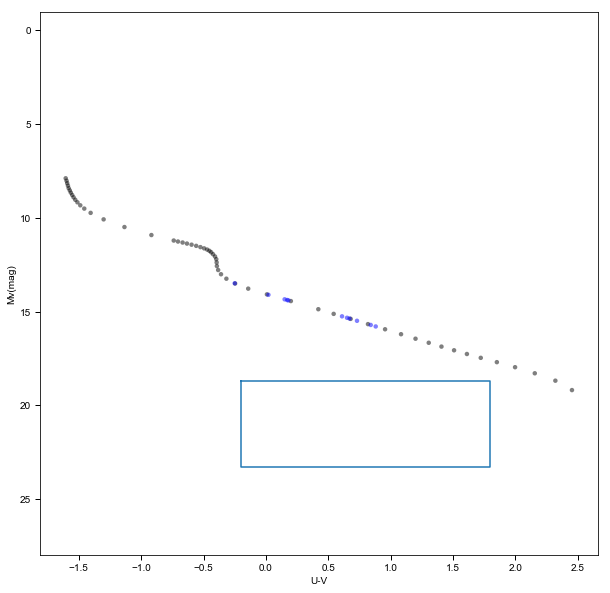

In [30]:
#plotting Mv calculated from weighted averages against UV vs Mv (table txt file) plot
#Mv from weighted averages should lay on the curve since it is an average of two Mv points on the curve
fig=plt.figure(figsize=(10,10))
plt.scatter(UV_7, Mv_7, c='black',edgecolors='none',s=20,alpha=0.5)
plt.ylim(28,-1)
plt.xlabel('U-V')
plt.ylabel('Mv(mag)')
plt.scatter(maddie_UV, Mv_wd_7, c='blue',edgecolors='none',s=20,alpha=0.5)
x_array = [-0.2, 1.8, 1.8, -0.2, -0.2]
y_array = [18.7, 18.7, 23.3, 23.3, 18.7]
plt.plot(x_array, y_array)

In [52]:
#converting PM from rad/sec to km/sec
PMW_km_per_sec_7 = np.array([])
PMW_km_per_sec_error_7 = np.array([])
PMN_km_per_sec_7 = np.array([])
PMN_km_per_sec_error_7 = np.array([])

print('PMW in km per sec')
for i in range(len(PMW)):
    print(PMW_radians_per_sec[i] * distance_wd_km_7[i], 'error:', PMW_error_radians_per_sec[i] * distance_wd_km_7[i])
    PMW_km_per_sec_7 = np.append(PMW_km_per_sec_7, (PMW_radians_per_sec[i] * distance_wd_km_7[i]))
    PMW_km_per_sec_error_7 = np.append(PMW_km_per_sec_error_7, (PMW_error_radians_per_sec[i] * distance_wd_km_7[i]))

print(PMW_km_per_sec_7)
print(PMW_km_per_sec_error_7)

print

print('PMN in km per sec')
for j in range(len(PMN)):
    print(PMN_radians_per_sec[j] * distance_wd_km_7[j], 'error: ', PMN_error_radians_per_sec[j] * distance_wd_km_7[j])
    PMN_km_per_sec_7 = np.append(PMN_km_per_sec_7, (PMN_radians_per_sec[j] * distance_wd_km_7[j]))
    PMN_km_per_sec_error_7 = np.append(PMN_km_per_sec_error_7, (PMN_error_radians_per_sec[j] * distance_wd_km_7[j]))

print(PMN_km_per_sec_7)
print(PMN_km_per_sec_error_7)

PMW in km per sec
(0.8816310895408618, 'error:', 0.038331786501776606)
(0.0, 'error:', 0.0)
(0.5296767498186492, 'error:', 0.1412471332849731)
(30.878794359547086, 'error:', 0.30273327803477545)
(19.049985028087967, 'error:', 0.24740240296218138)
(-6.827660860173968, 'error:', 0.5689717383478307)
(0.0, 'error:', 0.0)
(-22.838924444222844, 'error:', 0.4709056586437701)
(3.934550905528695, 'error:', 0.4371723228365217)
(0.11995828072616009, 'error:', 0.11995828072616009)
(0.8947380057046939, 'error:', 0.1677633760696301)
[  0.88163109   0.           0.52967675  30.87879436  19.04998503
  -6.82766086   0.         -22.83892444   3.93455091   0.11995828
   0.89473801]
[0.03833179 0.         0.14124713 0.30273328 0.2474024  0.56897174
 0.         0.47090566 0.43717232 0.11995828 0.16776338]

PMN in km per sec
(-1.2649489545586279, 'error: ', 0.038331786501776606)
(0.0, 'error: ', 0.0)
(-0.8474827997098388, 'error: ', 0.1412471332849731)
(18.466729960121302, 'error: ', 0.30273327803477545)
(-

In [65]:
#creating an array with PMW (+ error, no error, - error) for every WD --- 9 PM values for each WD
PMW_with_error = np.array([])
for i in range(0, len(PMW_km_per_sec_5)):
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_5[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_5[i] + PMW_km_per_sec_error_5[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_5[i] - PMW_km_per_sec_error_5[i])
    
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_6[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_6[i] + PMW_km_per_sec_error_6[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_6[i] - PMW_km_per_sec_error_6[i])
    
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_7[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_7[i] + PMW_km_per_sec_error_7[i])
    PMW_with_error = np.append(PMW_with_error, PMW_km_per_sec_7[i] - PMW_km_per_sec_error_7[i])

print(PMW_with_error)
print(len(PMW_with_error))

#creating an array with PMN (+ error, no error, - error) for every WD --- 9 PM values for each WD
PMN_with_error = np.array([])
for i in range(0, len(PMN_km_per_sec_5)):
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_5[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_5[i] + PMN_km_per_sec_error_5[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_5[i] - PMN_km_per_sec_error_5[i])

    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_6[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_6[i] + PMN_km_per_sec_error_6[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_6[i] - PMN_km_per_sec_error_6[i])
    
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_7[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_7[i] + PMN_km_per_sec_error_7[i])
    PMN_with_error = np.append(PMN_with_error, PMN_km_per_sec_7[i] - PMN_km_per_sec_error_7[i])

print(PMN_with_error)
print(len(PMW_with_error))
    
# [1:3] = including index 1, not including index 3

[  1.0739427    1.12063586   1.02724954   0.9729287    1.01522995
   0.93062745   0.88163109   0.91996288   0.8432993    0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.64489935   0.81687251
   0.47292619   0.58446387   0.74032091   0.42860684   0.52967675
   0.67092388   0.38842962  37.51636495  37.88417245  37.14855745
  34.03428139  34.36795082  33.70061197  30.87879436  31.18152764
  30.57606108  23.15210439  23.45278107  22.85142771  20.99669253
  21.26937685  20.72400822  19.04998503  19.29738743  18.80258263
  -8.5395151   -7.82788884  -9.25114136  -7.63499925  -6.99874931
  -8.27124918  -6.82766086  -6.25868912  -7.3966326    0.
   0.           0.           0.           0.           0.
   0.           0.           0.         -27.74628318 -27.17419487
 -28.3183715  -25.17282159 -24.65379434 -25.69184884 -22.83892444
 -22.36801879 -23.3098301    4.78007545   5.31119495   4.24895596
   4.3366205    4.81846722   3.85477378   

In [83]:
#calculating mean PMW from the 9 values for each WD
print(PMW_with_error[:9])
PMW_wd_1_mean = np.mean(PMW_with_error[:9])
print(PMW_with_error[9:18])
PMW_wd_2_mean = np.mean(PMW_with_error[9:18])
print(PMW_with_error[18:27])
PMW_wd_3_mean = np.mean(PMW_with_error[18:27])
print(PMW_with_error[27:36])
PMW_wd_4_mean = np.mean(PMW_with_error[27:36])
print(PMW_with_error[36:45])
PMW_wd_5_mean = np.mean(PMW_with_error[36:45])
print(PMW_with_error[45:54])
PMW_wd_6_mean = np.mean(PMW_with_error[45:54])
print(PMW_with_error[54:63])
PMW_wd_7_mean = np.mean(PMW_with_error[54:63])
print(PMW_with_error[63:72])
PMW_wd_8_mean = np.mean(PMW_with_error[63:72])
print(PMW_with_error[72:81])
PMW_wd_9_mean = np.mean(PMW_with_error[72:81])
print(PMW_with_error[81:90])
PMW_wd_10_mean = np.mean(PMW_with_error[81:90])
print(PMW_with_error[90:99])
PMW_wd_11_mean = np.mean(PMW_with_error[90:99])

print
print PMW_wd_1_mean
print PMW_wd_2_mean
print PMW_wd_3_mean
print PMW_wd_4_mean
print PMW_wd_5_mean
print PMW_wd_6_mean
print PMW_wd_7_mean
print PMW_wd_8_mean
print PMW_wd_9_mean
print PMW_wd_10_mean
print PMW_wd_11_mean

[1.0739427  1.12063586 1.02724954 0.9729287  1.01522995 0.93062745
 0.88163109 0.91996288 0.8432993 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.64489935 0.81687251 0.47292619 0.58446387 0.74032091 0.42860684
 0.52967675 0.67092388 0.38842962]
[37.51636495 37.88417245 37.14855745 34.03428139 34.36795082 33.70061197
 30.87879436 31.18152764 30.57606108]
[23.15210439 23.45278107 22.85142771 20.99669253 21.26937685 20.72400822
 19.04998503 19.29738743 18.80258263]
[-8.5395151  -7.82788884 -9.25114136 -7.63499925 -6.99874931 -8.27124918
 -6.82766086 -6.25868912 -7.3966326 ]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-27.74628318 -27.17419487 -28.3183715  -25.17282159 -24.65379434
 -25.69184884 -22.83892444 -22.36801879 -23.3098301 ]
[4.78007545 5.31119495 4.24895596 4.3366205  4.81846722 3.85477378
 3.93455091 4.37172323 3.49737858]
[0.1460355  0.29207101 0.         0.13232682 0.26465364 0.
 0.11995828 0.23991656 0.        ]
[1.08970984 1.29403043 0.88538924 0.98769389 1.17288649 0.80250129
 0.89473801 1.06250138

In [84]:
#calculating mean PMW from the 9 values for each WD
print(PMN_with_error[:9])
PMN_wd_1_mean = np.mean(PMN_with_error[:9])
print(PMN_with_error[9:18])
PMN_wd_2_mean = np.mean(PMN_with_error[9:18])
print(PMN_with_error[18:27])
PMN_wd_3_mean = np.mean(PMN_with_error[18:27])
print(PMN_with_error[27:36])
PMN_wd_4_mean = np.mean(PMN_with_error[27:36])
print(PMN_with_error[36:45])
PMN_wd_5_mean = np.mean(PMN_with_error[36:45])
print(PMN_with_error[45:54])
PMN_wd_6_mean = np.mean(PMN_with_error[45:54])
print(PMN_with_error[54:63])
PMN_wd_7_mean = np.mean(PMN_with_error[54:63])
print(PMN_with_error[63:72])
PMN_wd_8_mean = np.mean(PMN_with_error[63:72])
print(PMN_with_error[72:81])
PMN_wd_9_mean = np.mean(PMN_with_error[72:81])
print(PMN_with_error[81:90])
PMN_wd_10_mean = np.mean(PMN_with_error[81:90])
print(PMN_with_error[90:99])
PMN_wd_11_mean = np.mean(PMN_with_error[90:99])

print
print PMN_wd_1_mean
print PMN_wd_2_mean
print PMN_wd_3_mean
print PMN_wd_4_mean
print PMN_wd_5_mean
print PMN_wd_6_mean
print PMN_wd_7_mean
print PMN_wd_8_mean
print PMN_wd_9_mean
print PMN_wd_10_mean
print PMN_wd_11_mean

[-1.54087431 -1.49418115 -1.58756747 -1.39594118 -1.35363993 -1.43824242
 -1.26494895 -1.22661717 -1.30328074]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-1.03183896 -0.8598658  -1.20381212 -0.9351422  -0.77928517 -1.09099923
 -0.8474828  -0.70623567 -0.98872993]
[22.43625747 22.80406497 22.06844997 20.35383495 20.68750438 20.02016553
 18.46672996 18.76946324 18.16399668]
[-3.90879685 -3.60812017 -4.20947353 -3.54489614 -3.27221182 -3.81758046
 -3.21623124 -2.96882884 -3.46363364]
[-31.31155536 -30.59992911 -32.02318162 -27.99499724 -27.3587473
 -28.63124717 -25.03475649 -24.46578475 -25.60372823]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-43.19266764 -42.62057932 -43.76475595 -39.18655732 -38.66753007
 -39.70558457 -35.55337723 -35.08247157 -36.02428289]
[12.74686787 13.27798737 12.21574838 11.56432134 12.04616806 11.08247461
 10.49213575 10.92930807 10.05496343]
[-0.94923077 -0.80319527 -1.09526628 -0.86012434 -0.72779752 -0.99245116
 -0.77972882 -0.65977054 -0.89968711]
[-1.56645789 -1.43024416 -1.70267162 